In [1]:
#mount the drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#extract the dataset from zip 

#!unzip /content/drive/MyDrive/brain_tumor_classification/archive.zip -d /content/drive/MyDrive/brain_tumor_classification

In [3]:
#import the required libraries 

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
import random 
import tensorflow as tf 

from tensorflow.keras.layers import *

In [4]:
#All the paths :
train_dir = '/content/drive/MyDrive/AIHealthCare/brain_tumor_classification/brain_tumor_classification/Training/'
test_dir ='/content/drive/MyDrive/AIHealthCare/brain_tumor_classification/brain_tumor_classification/Testing/'


image_path = '/content/drive/MyDrive/AIHealthCare/brain_tumor_classification/brain_tumor_classification/Training/pituitary_tumor/p (1).jpg'

In [5]:
images_dir = '/content/drive/MyDrive/AIHealthCare/brain_tumor_classification/'
for i in range(20):
  plt.savefig(f"{images_dir}/abc"+str(i)+".png")

<Figure size 432x288 with 0 Axes>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%ls

drive/  sample_data/


image dimensions are  (512, 512, 3)


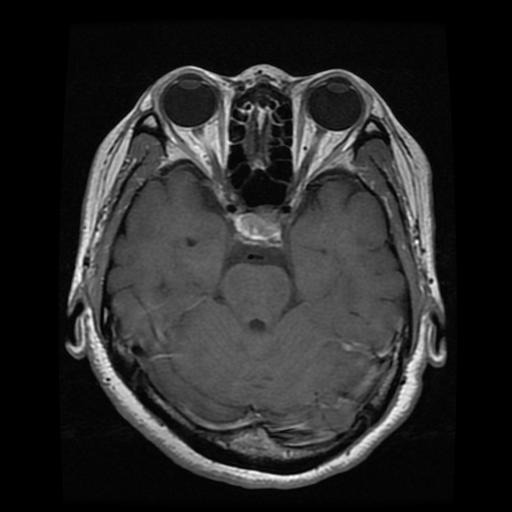

In [8]:
#display a sample image 


image_for_visualization = cv2.imread(image_path)
print('image dimensions are ', image_for_visualization.shape)
cv2_imshow(image_for_visualization)

# Defining the model architecture 

Let's defined the model, to check the how it would work on our defined model. 
For our model : 


In [9]:
epochs = 5

#dense model 

dense_model = tf.keras.Sequential([tf.keras.layers.Input((256, 256, 3)),  
                                  #tf.keras.layers.Dense(128, activation='relu'),
                                  #tf.keras.layers.Dense(64, activation='relu'),
                        
                                  #tf.keras.layers.Dense(64, activation='relu'),
                                  #tf.keras.layers.Dense(32, activation='relu'),
                                           
                                  tf.keras.layers.Dense(32, activation='relu'),
                                  tf.keras.layers.Dense(16, activation='relu'),
                                           
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(4, activation='softmax')
                                           ])

dense_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256, 256, 32)      128       
                                                                 
 dense_1 (Dense)             (None, 256, 256, 16)      528       
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense_2 (Dense)             (None, 4)                 4194308   
                                                                 
Total params: 4,194,964
Trainable params: 4,194,964
Non-trainable params: 0
_________________________________________________________________


In [10]:
#dense model 

dense_model_with_dropout = tf.keras.Sequential([tf.keras.layers.Input((256, 256, 3)),  
                                                #tf.keras.layers.Dense(128, activation='relu'),
                                                #tf.keras.layers.Dense(64, activation='relu'),
                                                #tf.keras.layers.Dropout(0.4),  #layer with no learnable parameters
                                                
                                                #tf.keras.layers.Dense(64, activation='relu'),
                                                #tf.keras.layers.Dense(32, activation='relu'),
                                                #tf.keras.layers.Dropout(0.4),

                                                tf.keras.layers.Dense(32, activation='relu'),
                                                tf.keras.layers.Dense(16, activation='relu'),
                                                tf.keras.layers.Dropout(0.4),

                                                tf.keras.layers.Flatten(),     #layer with no learnable parameters
                                                tf.keras.layers.Dense(4, activation='softmax')])

dense_model_with_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256, 256, 32)      128       
                                                                 
 dense_4 (Dense)             (None, 256, 256, 16)      528       
                                                                 
 dropout (Dropout)           (None, 256, 256, 16)      0         
                                                                 
 flatten_1 (Flatten)         (None, 1048576)           0         
                                                                 
 dense_5 (Dense)             (None, 4)                 4194308   
                                                                 
Total params: 4,194,964
Trainable params: 4,194,964
Non-trainable params: 0
_________________________________________________________________


In [11]:
# VGG16 example (off the shelf implementation)

model_vgg16 = tf.keras.applications.vgg16.VGG16(include_top=True, 
                                                weights=None, 
                                                input_shape=(256, 256, 3), classes=4,
                                                classifier_activation='softmax')


model_vgg16.compile(optimizer = tf.optimizers.Adam(),   # typically used optimizer for the gradient descent 
                    loss = 'categorical_crossentropy',        # used as the labels are one hot encoded vectors 
                    metrics=['accuracy']) 

model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

# Creating the data generator

Defining the training, validation and test data generators

In [12]:
# path to the training directory 


# data augmentation to be applied in train_datagen [augmentation only applied on the trainin data] 
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   shear_range=0.20, 
                                   zoom_range=0.20,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   validation_split=0.25)

test_datagen = ImageDataGenerator(rescale=1/255.)

# creating datagenerator for the training and validation data
train_generator = train_datagen.flow_from_directory(train_dir,  # This is the source directory for training images
                                                    target_size=(256, 256),
                                                    classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_dir, # same directory as training data
                                                         target_size=(256, 256),
                                                         class_mode='categorical',
                                                         subset='validation') # set as validation data

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(256, 256),
                                                  classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
                                                  class_mode='categorical')

Found 2155 images belonging to 4 classes.
Found 715 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


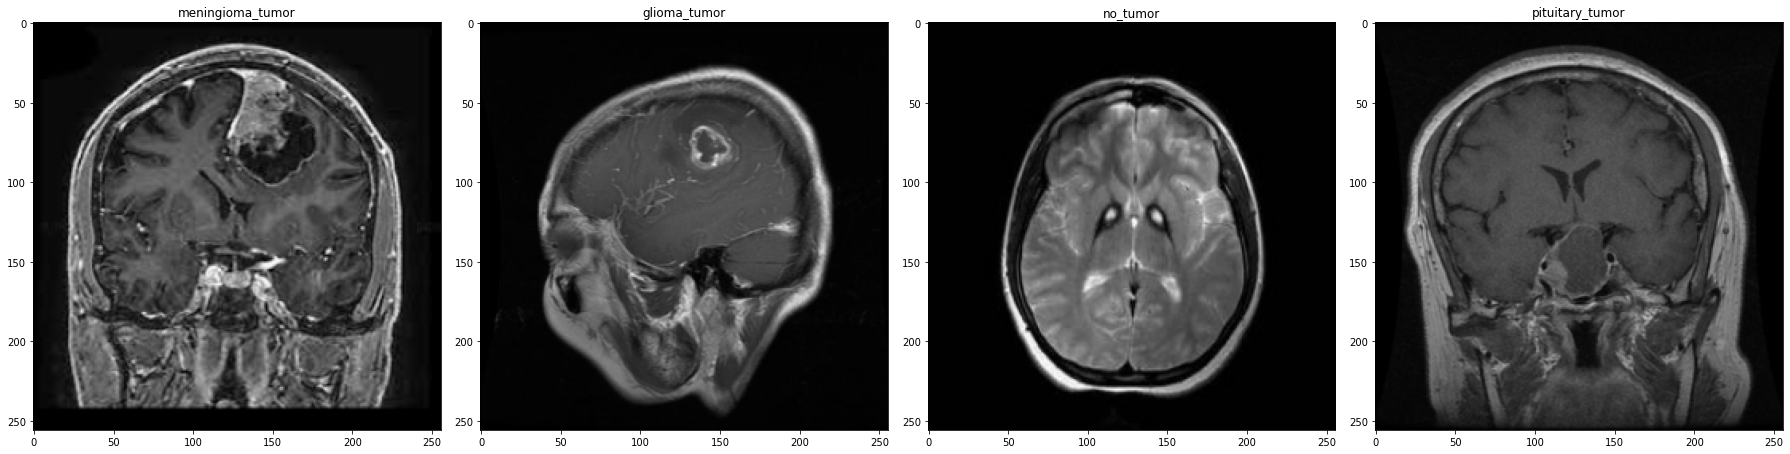

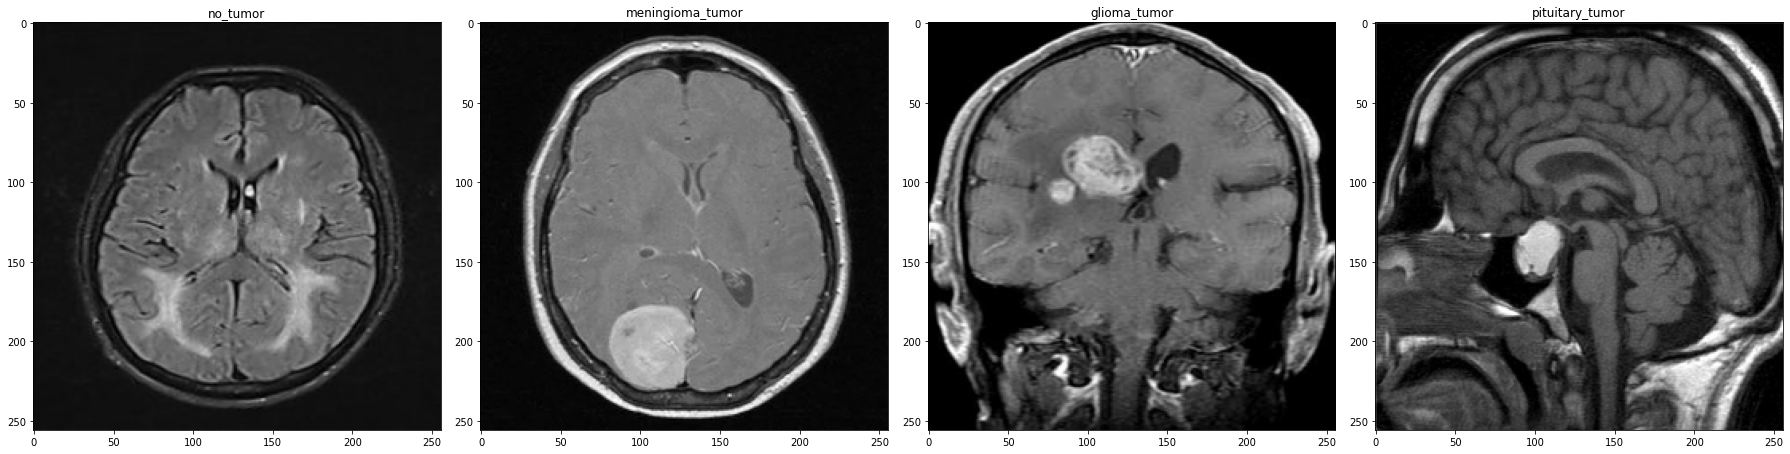

In [13]:
# visualization for training and testing data 

def visualizing_data(list_of_image_path, directory_path):
    index = 0 
    count = 1 
    plt.figure(figsize=(25, 8))

    for image in list_of_image_path:
        path = directory_path + image
        l = os.listdir(path)
        img = l[index]
        img_for_visualization = cv2.imread(path+'/'+img)
        resized_img_for_visualization = cv2.resize(img_for_visualization, (256, 256))
        #print('image selected to be visualized ', path+'/'+img)
        plt.subplot(1,4,count)
        plt.imshow(resized_img_for_visualization)
        plt.title(image)
        count += 1

    plt.tight_layout()


#training_dir = '/content/drive/MyDrive/brain_tumor_classification/Training/'
#testing_dir = '/content/drive/MyDrive/brain_tumor_classification/Testing/'

train_tumor_types = os.listdir(train_dir)
testing_tumor_types = os.listdir(test_dir)

visualizing_data(train_tumor_types, train_dir)
visualizing_data(testing_tumor_types, test_dir)

[0 1 2 3]


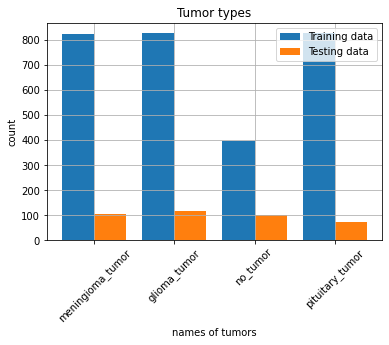

In [14]:
# plot the bar chart 

list_of_training_classes = os.listdir(train_dir) 
list_of_testing_classes = os.listdir(test_dir)

count_of_number_of_images_training = []
count_of_number_of_images_testing = [] 

for images in list_of_training_classes:
    path = train_dir + '/' + images
    count_of_number_of_images_training.append(len(os.listdir(path)))

for images in list_of_testing_classes:
    path = test_dir + '/' + images
    count_of_number_of_images_testing.append(len(os.listdir(path)))

names_of_tumors = list_of_training_classes

X_axis = np.arange(len(names_of_tumors))
print(X_axis)

plt.bar(X_axis - 0.2, count_of_number_of_images_training, 0.4, label = 'Training data')
plt.bar(X_axis + 0.2, count_of_number_of_images_testing, 0.4, label = 'Testing data')
  
plt.xticks(X_axis, names_of_tumors, rotation=45)
plt.xlabel("names of tumors")
plt.ylabel("count")
plt.title("Tumor types")
plt.legend()
plt.grid()
plt.show()

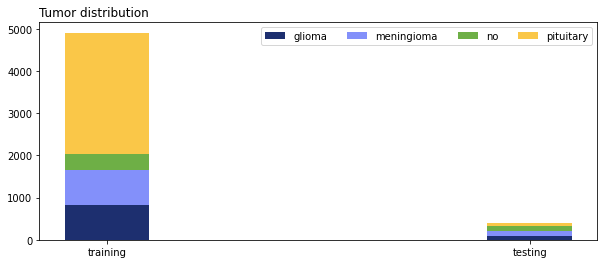

In [15]:

count_of_number_of_images_training = [826, 822, 395, 827]
count_of_number_of_images_testing = [100, 115, 105, 74]

names_of_tumors = ['glioma', 'meningioma', 'no tumor', 'pituitary']

x_ticks = ['training', 'testing']

# define figure
plt.figure(figsize=(10, 4))
# numerical x
x = np.arange(0, len(x_ticks))
# plot bars

plt.bar(x[0], count_of_number_of_images_training[0], width=0.2, color='#1D2F6F')
plt.bar(x[0], count_of_number_of_images_training[1], bottom=826, width=0.2, color='#8390FA')
plt.bar(x[0], 826+822+count_of_number_of_images_training[2], bottom=826+822, width=0.2, color='#6EAF46')
plt.bar(x[0], 826+822+395+count_of_number_of_images_training[3], bottom=822+826+395, width=0.2, color='#FAC748')

plt.bar(x[1], count_of_number_of_images_testing[0], width=0.2, color='#1D2F6F')
plt.bar(x[1], count_of_number_of_images_testing[1], bottom=100, width=0.2, color='#8390FA')
plt.bar(x[1], count_of_number_of_images_testing[2], bottom=100+115, width=0.2, color='#6EAF46')
plt.bar(x[1], count_of_number_of_images_testing[3], bottom=100+115+105, width=0.2, color='#FAC748')
'''
plt.bar(x[0], count_of_number_of_images_training[0], width=0.2)
plt.bar(x[0], count_of_number_of_images_training[1], bottom=826, width=0.2)
plt.bar(x[0], 826+822+count_of_number_of_images_training[2], bottom=826+822, width=0.2)
plt.bar(x[0], 826+822+395+count_of_number_of_images_training[3], bottom=822+826+395, width=0.2)

plt.bar(x[1], count_of_number_of_images_testing[0], width=0.2)
plt.bar(x[1], count_of_number_of_images_testing[1], bottom=100, width=0.2)
plt.bar(x[1], count_of_number_of_images_testing[2], bottom=100+115, width=0.2)
plt.bar(x[1], count_of_number_of_images_testing[3], bottom=100+115+105, width=0.2)
'''
plt.xticks(x, x_ticks)


# title and legend
plt.title('Tumor distribution', loc ='left')
plt.legend(['glioma', 'meningioma', 'no', 'pituitary'], ncol = 4)
plt.show()


## Training the model

Here our model is being trained, and we are saving the model as "user_defined_model.h5"

In [16]:
dense_model.compile(optimizer = tf.optimizers.Adam(),   # optimizer for the learning process 
                    loss = 'categorical_crossentropy',  # categorical : because one hot encoding 
                    metrics=['accuracy'])

dense_model_with_dropout.compile(optimizer = tf.optimizers.Adam(),   # optimizer for the learning process 
                    loss = 'categorical_crossentropy',  # categorical : because one hot encoding 
                    metrics=['accuracy'])

model_vgg16.compile(optimizer = tf.optimizers.Adam(),   # optimizer for the learning process 
                    loss = 'categorical_crossentropy',  # categorical : because one hot encoding 
                    metrics=['accuracy'])

In [18]:
history_dense_model = dense_model.fit_generator(train_generator,
                                                steps_per_epoch = train_generator.samples // 32,
                                                validation_data = validation_generator, 
                                                validation_steps = validation_generator.samples // 32,
                                                epochs = epochs)

# to save the trained model in .h5 file 
dense_model.save('/content/dense_model'+str(epochs)+'.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
67/67 [==============================] - 60s 903ms/step - loss: 0.9469 - accuracy: 0.6119 - val_loss: 1.1491 - val_accuracy: 0.5227
Epoch 2/5
67/67 [==============================] - 59s 884ms/step - loss: 0.9293 - accuracy: 0.6199 - val_loss: 1.1492 - val_accuracy: 0.5128
Epoch 3/5
67/67 [==============================] - 59s 889ms/step - loss: 0.8718 - accuracy: 0.6566 - val_loss: 1.1987 - val_accuracy: 0.4886
Epoch 4/5
67/67 [==============================] - 61s 917ms/step - loss: 0.8849 - accuracy: 0.6444 - val_loss: 1.2566 - val_accuracy: 0.4702
Epoch 5/5
67/67 [==============================] - 59s 886ms/step - loss: 0.8663 - accuracy: 0.6618 - val_loss: 1.2632 - val_accuracy: 0.4858


In [19]:
history_dense_model_with_dropout = dense_model_with_dropout.fit_generator(train_generator,
                                                                          steps_per_epoch = train_generator.samples // 32,
                                                                          validation_data = validation_generator, 
                                                                          validation_steps = validation_generator.samples // 32,
                                                                          epochs = epochs)

# to save the trained model in .h5 file 
dense_model_with_dropout.save('/content/dense_model_with_dropout'+str(epochs)+'.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
67/67 [==============================] - 62s 916ms/step - loss: 3.6504 - accuracy: 0.3773 - val_loss: 1.4107 - val_accuracy: 0.4276
Epoch 2/5
67/67 [==============================] - 62s 921ms/step - loss: 1.0442 - accuracy: 0.5864 - val_loss: 1.1503 - val_accuracy: 0.5071
Epoch 3/5
67/67 [==============================] - 62s 921ms/step - loss: 0.9359 - accuracy: 0.6287 - val_loss: 1.2463 - val_accuracy: 0.4503
Epoch 4/5
67/67 [==============================] - 61s 910ms/step - loss: 0.8466 - accuracy: 0.6642 - val_loss: 1.3457 - val_accuracy: 0.4616
Epoch 5/5
67/67 [==============================] - 59s 881ms/step - loss: 0.8881 - accuracy: 0.6566 - val_loss: 1.2003 - val_accuracy: 0.4886


In [ ]:
history_model_vgg16 = model_vgg16.fit_generator(train_generator,
                                                steps_per_epoch = train_generator.samples // 32,
                                                validation_data = validation_generator, 
                                                validation_steps = validation_generator.samples // 32,
                                                epochs = epochs)

# to save the trained model in .h5 file
model_vgg16.save('/content/model_vgg16'+str(epochs)+'.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5


In [ ]:
# plotting the performance of the model from the history object obtained after training 

plt.plot(history_dense_model.history['accuracy'])
plt.plot(history_dense_model.history['val_accuracy'])
plt.title('dense_model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(f"{images_dir}/history_dense_model_accuracy"+str(epoch)+".png", bbox_inches='tight')
plt.show()

plt.plot(history_dense_model.history['loss'])
plt.plot(history_dense_model.history['val_loss'])
plt.title('dense_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(f"{images_dir}/history_dense_model_loss"+str(epochs)+".png", bbox_inches='tight')
#plt.savefig('history_dense_model_loss'+str(epoch)+'.png', bbox_inches='tight')
plt.show()

# plotting the performance of the model from the history object obtained after training 

plt.plot(history_dense_model_with_dropout.history['accuracy'])
plt.plot(history_dense_model_with_dropout.history['val_accuracy'])
plt.title('dense_model_with_dropout accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(f"{images_dir}/history_dense_model_with_dropout_accuracy"+str(epoch)+".png", bbox_inches='tight')
#plt.savefig('history_dense_model_with_dropout_accuracy'+str(epoch)+'.png', bbox_inches='tight')
plt.show()

plt.plot(history_dense_model_with_dropout.history['loss'])
plt.plot(history_dense_model_with_dropout.history['val_loss'])
plt.title('dense_model_with_dropout loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(f"{images_dir}/history_dense_model_with_dropout_loss"+str(epochs)+".png", bbox_inches='tight')
#plt.savefig('history_dense_model_with_dropout_loss'+str(epoch)+'.png', bbox_inches='tight')
plt.show()

# plotting the performance of the model from the history object obtained after training 

plt.plot(history_model_vgg16.history['accuracy'])
plt.plot(history_model_vgg16.history['val_accuracy'])
plt.title('model_vgg16 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(f"{images_dir}/history_vgg16_accuracy"+str(epochs)+".png", bbox_inches='tight')
#plt.savefig('history_vgg16_accuracy'+str(epoch)+'.png', bbox_inches='tight')
plt.show()

plt.plot(history_model_vgg16.history['loss'])
plt.plot(history_model_vgg16.history['val_loss'])
plt.title('model_vgg16 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(f"{images_dir}/history_vgg16_loss"+str(epoch)+".png", bbox_inches='tight')
plt.show()

In [ ]:
# evaluation code 
dense_model.evaluate(test_generator)

In [ ]:
dense_model_with_dropout.evaluate(test_generator)

In [ ]:
model_vgg16.evaluate(test_generator)

# Load model for running inference on random test image

In [ ]:
dense_model = tf.keras.models.load_model('/content/dense_model'+str(epoch)+'.h5')
dense_model_dropout = tf.keras.models.load_model('/content/dense_model_with_dropout'+str(epoch)+'.h5')
vgg16_model = tf.keras.models.load_model('/content/model_vgg16'+str(epoch)+'.h5') 

'''
# change path to a test image 
test_image = '/content/drive/MyDrive/brain_tumor_classification/Training/pituitary_tumor/p (1).jpg'
test_image = cv2.imread(test_image)
print(test_image.shape)
test_image = np.expand_dims(test_image, axis=0) # adding batch dimension [network accepts input in the format of N, H, W, C]
print(test_image.shape)

dense_model_prediction = dense_model(test_image)
dense_model_dropout_prediction = dense_model(test_image)
vgg16_model = vgg16(test_image) 
'''

#References :
https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri?select=Training <br> 
https://cs231n.github.io/convolutional-networks/ <br>
https://stats.stackexchange.com/questions/201569/what-is-the-difference-between-dropout-and-drop-connect <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout <br>
https://arxiv.org/pdf/1512.03385.pdf <br> 
https://netron.app/ <br> 
https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fdatatype%2Fdeeplearning-ai-cnn-week-2-97e075f8c801&psig=AOvVaw1t_6hriWqI__Z0IdOOGkdI&ust=1633887674153000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCJD84YXwvfMCFQAAAAAdAAAAABAJ <br>
https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy <br>
https://arxiv.org/pdf/1409.1556.pdf <br>
https://www.kaggle.com/bonhart/brain-mri-data-visualization-unet-fpn <br> 
https://www.tensorflow.org/tutorials/images/transfer_learning <br> 